In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv', sep=';')
df

,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,0,...,NaN,NaN,21,2,0,0,0,0,578,3
1,4,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,15,6,0,1,0,0,441,3
2,5,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,47,2,1,0,0,0,637,3
3,6,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,6,...,NaN,NaN,26,2,1,0,0,0,473,3
4,7,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,4,...,NaN,NaN,10,1,3,0,0,0,147,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36898,159,10,2025,2025m10,35,4,Cachoeiras de Macacu,3300803,Interior,1,...,4.0,0.0,37,2,0,0,0,0,163,2
36899,165,10,2025,2025m10,33,5,Mangaratiba,3302601,Interior,1,...,4.0,0.0,21,0,0,0,0,0,196,2
36900,166,10,2025,2025m10,33,5,Angra dos Reis,3300100,Interior,3,...,12.0,0.0,82,8,0,1,0,0,682,2
36901,167,10,2025,2025m10,43,5,Paraty,3303807,Interior,1,...,2.0,1.0,11,1,0,0,0,0,195,2


In [4]:
df_furto_celular_dp = df.groupby('cisp')['furto_celular'].sum().reset_index()
df_furto_celular_dp =  df_furto_celular_dp.sort_values(by='furto_celular', ascending = False)
df_furto_celular_dp

,cisp,furto_celular
12,16,24879
2,5,23117
10,14,16945
8,12,16008
0,1,14968
...,...,...
87,104,72
77,92,63
131,157,55
114,138,52


In [5]:
array_furto_celular = np.array(df_furto_celular_dp['furto_celular'])
media_furto_celular = np.mean(array_furto_celular)
mediana_furto_celular = np.median(array_furto_celular)
q1_furto_celular = np.quantile(array_furto_celular, 0.25)
q2_furto_celular = np.quantile(array_furto_celular, 0.50)
q3_furto_celular = np.quantile(array_furto_celular, 0.75)
distancia = (media_furto_celular-mediana_furto_celular)/ mediana_furto_celular

iqr = q3_furto_celular - q1_furto_celular
limite_superior = q3_furto_celular + 1.5 * iqr
limite_inferior = q1_furto_celular - 1.5 * iqr


In [6]:
print(f'A média é {media_furto_celular}')
print(f'A mediana é {mediana_furto_celular}')
print(f'Primeiro quartil (Q1): {q1_furto_celular}')
print(f'Segundo quartil (Q2, Mediana): {q2_furto_celular}')
print(f'Terceiro quartil (Q3): {q3_furto_celular}')
print(f'a distancia entre a média e a mediana é: {distancia}')
print(f'o valor do limite superior é: {limite_superior}')
print(f'o valor do limite inferior é: {limite_inferior}')


A média é 3338.1159420289855
A mediana é 1633.5
Primeiro quartil (Q1): 449.0
Segundo quartil (Q2, Mediana): 1633.5
Terceiro quartil (Q3): 4498.25
a distancia entre a média e a mediana é: 1.0435359302289473
o valor do limite superior é: 10572.125
o valor do limite inferior é: -5624.875


In [7]:
df_furto_celular_q3 = df_furto_celular_dp.loc[df_furto_celular_dp['furto_celular'] > q3_furto_celular]
df_furto_celular_q1 = df_furto_celular_dp.loc[df_furto_celular_dp['furto_celular'] < q1_furto_celular]
outliers_furto_celular = df_furto_celular_dp.loc[df_furto_celular_dp['furto_celular'] > limite_superior]
outliers_furto_celular


,cisp,furto_celular
12,16,24879
2,5,23117
10,14,16945
8,12,16008
0,1,14968
5,9,14159
6,10,14105
1,4,13318
14,18,12939
28,32,12206


In [8]:
df_furto_celular_q3.head(10)

,cisp,furto_celular
12,16,24879
2,5,23117
10,14,16945
8,12,16008
0,1,14968
5,9,14159
6,10,14105
1,4,13318
14,18,12939
28,32,12206


In [9]:
df_furto_celular_q1 = df_furto_celular_q1.sort_values(by='furto_celular', ascending = True)
df_furto_celular_q1.head(10)
                        

,cisp,furto_celular
129,155,47
114,138,52
131,157,55
77,92,63
87,104,72
41,45,73
94,111,81
83,98,90
126,152,107
130,156,108


In [10]:
df['roubo_furto_veiculo'] = df['roubo_veiculo'] + df['furto_veiculos']
df_veiculo_rj = df.loc[(df['regiao'] == 'Capital')]
df_veiculo_rj

,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase,roubo_furto_veiculo
0,1,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,0,...,NaN,21,2,0,0,0,0,578,3,17
1,4,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,15,6,0,1,0,0,441,3,18
2,5,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,47,2,1,0,0,0,637,3,39
3,6,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,6,...,NaN,26,2,1,0,0,0,473,3,44
4,7,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,4,...,NaN,10,1,3,0,0,0,147,3,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36802,40,10,2025,2025m10,9,2,Rio de Janeiro,3304557,Capital,4,...,0.0,25,5,1,0,0,0,628,2,69
36803,41,10,2025,2025m10,18,2,Rio de Janeiro,3304557,Capital,0,...,0.0,49,0,0,0,0,0,856,2,35
36804,42,10,2025,2025m10,31,2,Rio de Janeiro,3304557,Capital,3,...,2.0,102,6,3,0,0,0,1450,2,79
36805,43,10,2025,2025m10,27,2,Rio de Janeiro,3304557,Capital,2,...,1.0,110,13,1,0,0,0,691,2,22


In [11]:
df_veiculo_dp = df_veiculo_rj.groupby('cisp')['roubo_furto_veiculo'].sum().reset_index()
df_veiculo_dp =  df_veiculo_dp.sort_values(by='roubo_furto_veiculo', ascending = False)
df_veiculo_dp

,cisp,roubo_furto_veiculo
23,27,39024
30,34,36897
31,35,33436
35,39,32500
34,38,25999
29,33,25899
17,21,25267
18,22,22896
36,40,22451
25,29,21722


In [12]:
array_veiculo = np.array(df_veiculo_dp['roubo_furto_veiculo']) 
media_veiculo = np.mean(array_veiculo)
mediana_veiculo = np.median(array_veiculo)
q1_veiculo = np.quantile(array_veiculo, 0.25)
q2_veiculo = np.quantile(array_veiculo, 0.50)
q3_veiculo = np.quantile(array_veiculo, 0.75)
distancia_veiculo = (media_veiculo-mediana_veiculo)/ mediana_veiculo
iqr_veiculo = q3_veiculo - q1_veiculo
limite_superior_veiculo = q3_veiculo + 1.5 *iqr_veiculo
limite_inferior_veiculo = q1_veiculo - 1.5 *iqr_veiculo
    

In [13]:
print(f'A média é {media_veiculo}')
print(f'A mediana é {mediana_veiculo}')
print(f'Primeiro quartil (Q1): {q1_veiculo}')
print(f'Segundo quartil (Q2, Mediana): {q2_veiculo}')
print(f'Terceiro quartil (Q3): {q3_veiculo}')
print(f'a distancia entre a média e a mediana é: {distancia_veiculo}')
print(f'o valor do limite superior é: {limite_superior_veiculo}')
print(f'o valor do limite inferior é: {limite_inferior_veiculo}')

A média é 13949.333333333334
A mediana é 12701.0
Primeiro quartil (Q1): 5015.25
Segundo quartil (Q2, Mediana): 12701.0
Terceiro quartil (Q3): 18068.75
a distancia entre a média e a mediana é: 0.098286224181823
o valor do limite superior é: 37649.0
o valor do limite inferior é: -14565.0


In [14]:
outliers_veiculo = df_veiculo_dp.loc[df_veiculo_dp['roubo_furto_veiculo'] > limite_superior_veiculo]
outliers_veiculo

,cisp,roubo_furto_veiculo
23,27,39024


In [16]:
df = pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/BaseMunicipioMensal.csv', sep=';', encoding='latin1')
df

,fmun_cod,fmun,ano,mes,mes_ano,regiao,hom_doloso,lesao_corp_morte,latrocinio,cvli,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,3300100,Angra dos Reis,2014,1,2014m01,Interior,11,0,0,11,...,8,0,98,13,3,0,0,0,561,3
1,3300159,Aperibé,2014,1,2014m01,Interior,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,3300209,Araruama,2014,1,2014m01,Interior,2,0,0,2,...,5,0,91,10,1,0,0,0,480,3
3,3300225,Areal,2014,1,2014m01,Interior,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,3300233,Armação dos Búzios,2014,1,2014m01,Interior,2,0,0,2,...,3,2,46,0,0,0,0,0,309,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13060,3306008,Três Rios,2025,10,2025m10,Interior,3,0,0,3,...,22,0,68,3,0,0,0,0,536,2
13061,3306107,Valença,2025,10,2025m10,Interior,0,0,0,0,...,8,3,31,3,1,0,0,0,227,2
13062,3306156,Varre-Sai,2025,10,2025m10,Interior,0,0,0,0,...,1,0,5,0,0,0,0,0,20,2
13063,3306206,Vassouras,2025,10,2025m10,Interior,1,0,0,1,...,1,0,15,2,0,0,0,0,139,2


In [19]:
#Fazer Lista

reg_metro = ['Niterói', 'São Gonçalo', 'Duque de Caxias', 'Nova Iguaçu', 'Belford Roxo', 'São João de Meriti', 'Nilópolis', 'Mesquita', 'Queimados', 'Japeri', 'Paracambi', 'Itaguaí', 'Magé', 'Guapimirim', 'Tanguá', 'Rio Bonito', 'Cabo Frio', 'Araruama', 'Saquarema', 'Itaipuaçu', 'Maricá', 'Búzios', 'Cachoeiras de Macacu']

df_veiculo_metropole = df.loc[(df['regiao'] != 'Interior' )]
df_veiculo_metropole = df_veiculo_metropole.loc[(df_veiculo_metropole[('ano')]  >= 2015 )]
df_veiculo_metropole = df_veiculo_metropole.groupby('munic')['furto_veiculos'].sum().reset_index()
df_veiculo_metropole =  df_veiculo_metropole.sort_values(by='furto_veiculos', ascending = False)
df_veiculo_metropole

#Dados tirados: https://www.ispdados.rj.gov.br/estatistica.html

,munic,furto_veiculos
13,Rio de Janeiro,78688
15,São Gonçalo,12459
1,Duque de Caxias,11506
10,Nova Iguaçu,10269
9,Niterói,7339
16,São João de Meriti,5858
0,Belford Roxo,4404
7,Mesquita,2479
5,Magé,2433
8,Nilópolis,2158


In [21]:
array_metropole = np.array(df_veiculo_metropole['furto_veiculos'])
media_metropole = np.mean(array_metropole)
mediana_metropole = np.median(array_metropole)
q1_metropole = np.quantile(array_metropole, 0.25)
q2_metropole = np.quantile(array_metropole, 0.50)
q3_metropole = np.quantile(array_metropole, 0.75)
distancia_metropole = (media_metropole-mediana_metropole)/ mediana_metropole
iqr_metropole = q3_metropole - q1_metropole
limite_superior_metropole = q3_metropole + 1.5 * iqr_metropole
limite_inferior_metropole = q1_metropole - 1.5 * iqr_metropole


In [22]:
print(f'A média é {media_metropole}')
print(f'A mediana é {mediana_metropole}')
print(f'Primeiro quartil (Q1): {q1_metropole}')
print(f'Segundo quartil (Q2, Mediana): {q2_metropole}')
print(f'Terceiro quartil (Q3): {q3_metropole}')
print(f'a distancia entre a média e a mediana é: {distancia_metropole}')
print(f'o valor do limite superior é: {limite_superior_metropole}')
print(f'o valor do limite inferior é: {limite_inferior_metropole}')

A média é 8487.176470588236
A mediana é 2433.0
Primeiro quartil (Q1): 1326.0
Segundo quartil (Q2, Mediana): 2433.0
Terceiro quartil (Q3): 7339.0
a distancia entre a média e a mediana é: 2.488358598679916
o valor do limite superior é: 16358.5
o valor do limite inferior é: -7693.5


In [24]:
outliers_metropole = df_veiculo_metropole.loc[df_veiculo_metropole['furto_veiculos'] > limite_superior_veiculo]
outliers_metropole

,munic,furto_veiculos
13,Rio de Janeiro,78688


In [ ]:
df = pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/UppEvolucaoMensalDeTitulos.csv', sep=';', encoding='latin1')
df

In [ ]:
df_upp_drogas = df.groupby('upp')['apreensao_drogas'].sum().reset_index()
df_upp_drogas =  df_upp_drogas.sort_values(by='apreensao_drogas', ascending = False)
df_upp_drogas

In [34]:
array_upp = np.array(df_upp_drogas['apreensao_drogas'])
media_upp = np.mean(array_upp)
mediana_upp = np.median(array_upp)
q1_upp = np.quantile(array_upp, 0.25)
q2_upp = np.quantile(array_upp, 0.50)
q3_upp = np.quantile(array_upp, 0.75)
distancia_upp = (media_upp-mediana_upp)/ mediana_upp
iqr_upp = q3_upp - q1_upp
limite_superior_upp = q3_upp + 1.5 * iqr_upp
limite_inferior_upp = q1_upp - 1.5 * iqr_upp

In [36]:
print(f'A média é {media_upp}')
print(f'A mediana é {mediana_upp}')
print(f'Primeiro quartil (Q1): {q1_upp}')
print(f'Segundo quartil (Q2, Mediana): {q2_upp}')
print(f'Terceiro quartil (Q3): {q3_upp}')
print(f'a distancia entre a média e a mediana é: {distancia_upp}')
print(f'o valor do limite superior é: {limite_superior_upp}')
print(f'o valor do limite inferior é: {limite_inferior_upp}')

A média é 508.05263157894734
A mediana é 402.0
Primeiro quartil (Q1): 263.0
Segundo quartil (Q2, Mediana): 402.0
Terceiro quartil (Q3): 596.0
a distancia entre a média e a mediana é: 0.26381251636554065
o valor do limite superior é: 1095.5
o valor do limite inferior é: -236.5


In [37]:
outliers_upp = df_upp_drogas.loc[df_upp_drogas['apreensao_drogas'] > limite_superior_upp]
outliers_upp 

,upp,apreensao_drogas
12,Cidade de Deus,2818
37,Vila Kennedy,1363
18,Jacarezinho,1132


In [ ]:
df = pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv', sep=';')
df_metropole = df.loc[(df['regiao'] != 'Interior' )]
df_metropole_atual = df_metropole.loc[(df_metropole[('ano')]  >= 2023) & (df_metropole[('ano')]  <= 2024)]
df_metropole_atual
df_metropole_passada = df_metropole.loc[(df_metropole[('ano')]  >= 2019) & (df_metropole[('ano')]  <= 2020)]
df_metropole_passada

In [66]:
df_estelionato_atual = df_metropole_atual.groupby('cisp')['estelionato'].sum().reset_index()
df_estelionato_atual = df_estelionato_atual.sort_values(by='estelionato', ascending=True)
df_estelionato_atual

,cisp,estelionato
7,11,380
55,63,443
43,51,507
53,61,651
4,7,753
...,...,...
56,64,5797
38,42,6433
28,32,9529
12,16,9665


In [67]:
array_atual = np.array(df_estelionato_atual['estelionato'])
media_atual = np.mean(array_atual)
mediana_atual = np.median(array_atual)
q1_atual = np.quantile(array_atual, 0.25)
q2_atual = np.quantile(array_atual, 0.50)
q3_atual = np.quantile(array_atual, 0.75)
distancia_atual = (media_atual-mediana_atual)/ mediana_atual
iqr_atual = q3_atual - q1_atual
limite_superior_atual = q3_atual + 1.5 * iqr_atual
limite_inferior_atual = q1_atual - 1.5 * iqr_atual

print(f'A média é {media_atual}')
print(f'A mediana é {mediana_atual}')
print(f'Primeiro quartil (Q1): {q1_atual}')
print(f'Segundo quartil (Q2, Mediana): {q2_atual}')
print(f'Terceiro quartil (Q3): {q3_atual}')
print(f'a distancia entre a média e a mediana é: {distancia_atual}')
print(f'o valor do limite superior é: {limite_superior_atual}')
print(f'o valor do limite inferior é: {limite_inferior_atual}')

A média é 2894.9285714285716
A mediana é 2350.0
Primeiro quartil (Q1): 1668.25
Segundo quartil (Q2, Mediana): 2350.0
Terceiro quartil (Q3): 3543.75
a distancia entre a média e a mediana é: 0.23188449848024323
o valor do limite superior é: 6357.0
o valor do limite inferior é: -1145.0


In [68]:
outliers_atual = df_estelionato_atual.loc[df_estelionato_atual['estelionato'] > limite_superior_atual]
outliers_atual

,cisp,estelionato
38,42,6433
28,32,9529
12,16,9665
31,35,10026


In [50]:
df_estelionato_passada = df_metropole_passada.groupby('cisp')['estelionato'].sum().reset_index()
df_estelionato_passada = df_estelionato_passada.sort_values(by='estelionato', ascending=False)
df_estelionato_passada

array_passada = np.array(df_estelionato_passada['estelionato'])
media_passada = np.mean(array_passada)
mediana_passada = np.median(array_passada)
q1_passada = np.quantile(array_passada, 0.25)
q2_passada = np.quantile(array_passada, 0.50)
q3_passada = np.quantile(array_passada, 0.75)
distancia_passada = (media_passada-mediana_passada)/ mediana_passada
iqr_passada = q3_passada - q1_passada
limite_superior_passada = q3_passada + 1.5 * iqr_passada
limite_inferior_passada = q1_passada - 1.5 * iqr_passada

print(f'A média é {media_passada}')
print(f'A mediana é {mediana_passada}')
print(f'Primeiro quartil (Q1): {q1_passada}')
print(f'Segundo quartil (Q2, Mediana): {q2_passada}')
print(f'Terceiro quartil (Q3): {q3_passada}')
print(f'a distancia entre a média e a mediana é: {distancia_passada}')
print(f'o valor do limite superior é: {limite_superior_passada}')
print(f'o valor do limite inferior é: {limite_inferior_passada}')

A média é 1039.3142857142857
A mediana é 778.0
Primeiro quartil (Q1): 486.25
Segundo quartil (Q2, Mediana): 778.0
Terceiro quartil (Q3): 1527.5
a distancia entre a média e a mediana é: 0.3358795446199045
o valor do limite superior é: 3089.375
o valor do limite inferior é: -1075.625


In [51]:
outliers_passada = df_estelionato_passada.loc[df_estelionato_passada['estelionato'] > limite_superior_passada]
outliers_passada

,cisp,estelionato
31,35,3592


C:\Users\gustavo.campos\AppData\Local\Temp\ipykernel_32472\3617961836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_atual['cisp'] = outliers_atual['cisp'].astype(str)


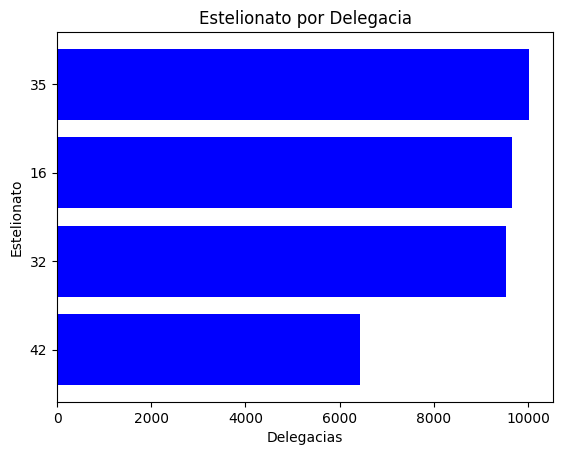

In [ ]:
outliers_atual['cisp'] = outliers_atual['cisp'].astype(str)
df = outliers_atual
plt.bar(df['cisp'], df['estelionato'], color='blue')
plt.title('Estelionato por Delegacia')
plt.xlabel('Delegacias')
plt.ylabel('Estelionato')
plt.show()